In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sctk as sk
import seaborn

In [2]:
# Patient metadata
metadata = pd.read_csv('../data/sample_metadata.csv')
metadata

,GEX_SID,ATAC_SID,GEX,ATAC,Sample,Donor,DOB,Gender,date,age_years,state,disease,site_taken_fine,site_taken_broad,sorted,Nancy_histologic_score,slide_look_other,whole_tissue_signature,scSeq,bulkSeq
0,R01,A01,GX46,NX02,110543,d1,24/10/1951,M,21/06/2018,66,inflamed,CD,ileo-colon,small intestine,CD45-EPCAM-CD31-THY1+PDPN+,4.0,"ulcers, granulation tissue (swapped)",M4M5,RNA+ATAC,ATAC + CD45+RNA
1,R02,A02,GX34,NX10,110544,d1,24/10/1951,M,21/06/2018,66,non-inflamed,CD,ileo-colon,small intestine,CD45-EPCAM-CD31-THY1+PDPN+,0.0,normal,M6,RNA+ATAC,ATAC + CD45+RNA
2,R03,A03,GX58,NX18,110559,d2,06/01/1987,F,05/07/2018,31,inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31-THY1+PDPN+,4.0,"ulcers, granulation tissue",M6,RNA+ATAC,ATAC + CD45+RNA
3,R04,A04,GX70,NX26,110560,d2,06/01/1987,F,05/07/2018,31,non-inflamed,CD,ascending colon,large intestine,CD45-EPCAM-CD31-THY1+PDPN+,0.0,normal,M6,RNA+ATAC,ATAC + CD45+RNA
4,R05,A05,GX42,NX02,110501,d3,03/06/1976,F,17/05/2018,41,inflamed,CD,descending colon,large intestine,CD45-EPCAM-CD31+THY1+PDPN+,NaN,"502 has ulcers, massive",M4M5,RNA+ATAC,NaN
5,R06,A06,GX54,NX10,110373,d4,21/12/1958,M,22/02/2018,59,inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,4.0,some ulcers,M4M5,RNA+ATAC,NaN
6,R07,A07,GX66,NX18,110375,d4,21/12/1958,M,22/02/2018,59,non-inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,2.0,some ulcers,M6,RNA+ATAC,NaN
7,R08,A08,GX78,NX26,110614,d5,16/09/1960,F,16/08/2018,57,inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,1.0,massive NE and PDPN(slide not consistent with ...,M4M5,RNA+ATAC,NaN
8,R09,A09,GX90,NX34,110615,d5,16/09/1960,F,16/08/2018,57,non-inflamed,CD,colon,large intestine,CD45-EPCAM-CD31+THY1+PDPN+,0.0,normal,M4M5,RNA+ATAC,NaN
9,R10,A10,GX07,NX42,110457,d6,22/12/1994,M,05/04/2018,23,inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,4.0,no NE but loads PDPN,M4M5,RNA+ATAC,NaN


In [3]:
# Load peak matrix
adata = sc.read("../20201116_scATAC_batch1_2/scATAC_PeakMatrix.processed.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 77712 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 

In [5]:
adata.var

,idx,cc,mito,ribo,hb,n_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection,hvg_full
index,,,,,,,,,,,,,,
"chr1:794840-795340,FAM87B,Distal",1,False,False,False,False,701.0,343,False,0.021682,1.849423,-0.648168,0,False,False
"chr1:807550-808050,FAM87B,Distal",2,False,False,False,False,1087.0,528,False,0.045866,2.222168,-0.159046,0,False,False
"chr1:811011-811511,FAM87B,Distal",3,False,False,False,False,571.0,313,False,0.019063,1.664429,-0.936197,0,False,False
"chr1:817090-817590,FAM87B,Promoter",4,False,False,False,False,6905.0,3294,False,0.273199,2.757253,-1.465199,0,False,False
"chr1:817824-818324,FAM87B,Exonic",5,False,False,False,False,3959.0,1875,False,0.170122,2.665135,-0.883931,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"chrX:155880997-155881497,TMLHE,Distal",9442,False,False,False,False,11971.0,5296,False,0.513941,3.143605,-0.467171,1,False,False
"chrX:155881594-155882094,TMLHE,Distal",9443,False,False,False,False,1373.0,822,False,0.047202,2.284997,0.033293,0,False,False
"chrX:155888133-155888633,TMLHE,Distal",9444,False,False,False,False,1455.0,680,False,0.067243,2.697505,0.384336,2,False,False


In [6]:
adata.obs

,BlacklistRatio,DoubletEnrichment,DoubletScore,nDiFrags,nFrags,nMonoFrags,nMultiFrags,NucleosomeRatio,PromoterRatio,ReadsInBlacklist,...,percent_hb,n_counts_hb,percent_top50,scrublet_score_z,leiden_bk_r0_3,leiden_bk_r0_5,leiden_bk_r0_7,leiden_bk_split1,leiden_bk_split2,annot1
index,,,,,,,,,,,,,,,,,,,,,
A11#GGACACCCAAGCCTTA-1,0.003560,0.826667,-0.000000,21941.0,64041.0,37125.0,4975.0,0.725010,0.168704,456.0,...,0.0,0.0,0.271702,-0.000000,6,4,4,4,"4,1",S5
A11#AACTGGTAGCGCCTAC-1,0.003975,0.906667,-0.000000,28270.0,60753.0,26802.0,5681.0,1.266734,0.133714,483.0,...,0.0,0.0,0.345823,-0.000000,0,4,4,4,"4,1",S5
A11#AACGAGGGTTTGCCAA-1,0.003965,0.866667,-0.000000,20405.0,58888.0,35658.0,2825.0,0.651467,0.131393,467.0,...,0.0,0.0,0.336208,-0.000000,1,1,6,6,6,S1
A11#GCAACCGGTGGTACTT-1,0.003886,0.946667,-0.000000,18864.0,55969.0,34210.0,2895.0,0.636042,0.120808,435.0,...,0.0,0.0,0.333840,-0.000000,0,4,4,4,"4,1",S5
A11#TTACGTTAGCATACCT-1,0.004228,0.573333,-0.000000,21325.0,55469.0,30477.0,3667.0,0.820028,0.145820,469.0,...,0.0,0.0,0.315886,-0.000000,1,1,6,6,6,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A08#CACTGAAGTTCCAATG-1,0.012099,0.800000,-0.000000,849.0,2149.0,1167.0,133.0,0.841474,0.115635,52.0,...,0.0,0.0,7.875579,-0.000000,2,2,2,"2,0","2,0",VE postcapillary venlue
A08#TTAGGTGCATCGGCCA-1,0.006836,0.400000,-0.000000,789.0,2121.0,1217.0,115.0,0.742810,0.168788,29.0,...,0.0,0.0,5.563094,-0.000000,0,4,4,4,"4,1",S5
A08#CCGTGAGTCGAACACT-1,0.003305,2.200000,5.255331,858.0,2118.0,1083.0,177.0,0.955679,0.165014,14.0,...,0.0,0.0,5.397859,5.255331,7,7,10,10,10,PC


In [7]:
adata.obs.annot1.value_counts()

annot1
S1                         18132
S3                         15791
VE postcapillary venlue     7757
S2                          7452
S5                          4881
LE                          4602
MF1                         4135
VE arterial tip             3945
S3x                         3819
VE arterial                 3253
PC                          1678
GL                          1350
S4                           801
IM                           116
Name: count, dtype: int64

# Replicate original UMAP plot

In [8]:
# Write UMAP embedding to default name, enabling plot call with sc.pl.umap()
adata.obsm['X_umap'] = adata.obsm['X_umap_bk']

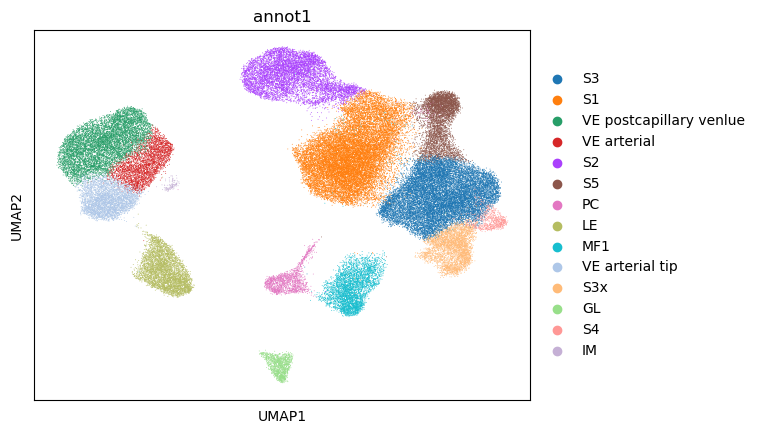

In [9]:
# Plot to ensure that data is identical
sc.pl.umap(adata, color='annot1')

# Filter on fibroblasts, MF, and PC cell populations

In [10]:
# Subset data
select_cells = ['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'MF2', 'PC']
adata = adata[adata.obs.annot1.isin(select_cells)]

In [11]:
adata.obs.annot1 = adata.obs.annot1.cat.add_categories('MF2')  # add missing category (such that coloring scheme aligns with scRNA-seq data)

# Reorder annotation labels
adata.obs.annot1 = adata.obs.annot1.cat.reorder_categories([
    'S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'MF2', 'PC'  # data does not contain MF2
])

In [12]:
adata

AnnData object with n_obs × n_vars = 56689 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 

In [13]:
pd.set_option('display.max_columns', None)
adata.obs

,BlacklistRatio,DoubletEnrichment,DoubletScore,nDiFrags,nFrags,nMonoFrags,nMultiFrags,NucleosomeRatio,PromoterRatio,ReadsInBlacklist,ReadsInPromoter,ReadsInTSS,Sample_x,TSSEnrichment,Clusters,predictedCell_Un,predictedGroup_Un,predictedScore_Un,predictedCell_Co,predictedGroup_Co,predictedScore_Co,Clusters_hm,predictedCell_Un_hm,predictedGroup_Un_hm,predictedScore_Un_hm,predictedCell_Co_hm,predictedGroup_Co_hm,predictedScore_Co_hm,predictedCell,predictedGroup,predictedScore,Annot,Clusters1,ReadsInPeaks,FRIP,GEX_SID,ATAC_SID,GEX,ATAC,Sample_y,DOB,Gender,date,age_years,state,disease,site_taken_fine,site_taken_broad,sorted,Nancy_histologic_score,slide_look_other,whole_tissue_signature,scSeq,bulkSeq,n_counts,log1p_n_counts,n_genes,log1p_n_genes,percent_mito,n_counts_mito,percent_ribo,n_counts_ribo,percent_hb,n_counts_hb,percent_top50,scrublet_score_z,leiden_bk_r0_3,leiden_bk_r0_5,leiden_bk_r0_7,leiden_bk_split1,leiden_bk_split2,annot1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A11#GGACACCCAAGCCTTA-1,0.003560,0.826667,-0.000000,21941.0,64041.0,37125.0,4975.0,0.725010,0.168704,456.0,21608.0,20380.0,A11,12.259,S5,GTCCACTCATTAAGCC-R10,S5,0.930315,TCGAAGTCATCTTAGG-R10,S5,0.974166,C12,CACAGATTCCCTTGGT-R08,S5,0.919000,GTCTAGAAGAACAAGG-R10,S5,0.810135,CCACCATTCAAGTGTC-R08,S5,0.990794,S5,S5,76469.0,0.597050,R11,A11,GX19,NX50,110458,22/12/1994,M,5/4/2018,23,non-inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,1.0,"some NE, by FACS more inflamed than 457",high,RNA+ATAC,nan,64041.0,11.067294,35472,10.476527,0.0,0.0,0.0,0.0,0.0,0.0,0.271702,-0.000000,6,4,4,4,"4,1",S5
A11#AACTGGTAGCGCCTAC-1,0.003975,0.906667,-0.000000,28270.0,60753.0,26802.0,5681.0,1.266734,0.133714,483.0,16247.0,14158.0,A11,8.718,S1,AGGAAATTCATTCGTT-R04,S1,0.798763,TAGACCACACAATCTG-R10,S1,0.799853,C26,ATCGATGCAAGTCATC-R02,S1,0.739834,AGGCCACGTGCATCTA-R05,S5,0.350905,ACAGGGAGTAAGCGGT-R07,S5,0.298547,S1,S1,58897.0,0.484765,R11,A11,GX19,NX50,110458,22/12/1994,M,5/4/2018,23,non-inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,1.0,"some NE, by FACS more inflamed than 457",high,RNA+ATAC,nan,60753.0,11.014588,29901,10.305681,0.0,0.0,0.0,0.0,0.0,0.0,0.345823,-0.000000,0,4,4,4,"4,1",S5
A11#AACGAGGGTTTGCCAA-1,0.003965,0.866667,-0.000000,20405.0,58888.0,35658.0,2825.0,0.651467,0.131393,467.0,15475.0,12567.0,A11,7.671,S1,TTGCGTCTCAAATGCC-R11,S1,0.872486,TAGACCACACAATCTG-R10,S1,0.948575,C25,AACCATGTCAGACAAA-R09,S1,0.940081,GTCAGCGTCGCTGTTC-R02,S1,0.951609,CTGTGAAGTGAGCTCC-R10,S1,0.688192,S1,S1,60797.0,0.516235,R11,A11,GX19,NX50,110458,22/12/1994,M,5/4/2018,23,non-inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,1.0,"some NE, by FACS more inflamed than 457",high,RNA+ATAC,nan,58888.0,10.983410,29240,10.283327,0.0,0.0,0.0,0.0,0.0,0.0,0.336208,-0.000000,1,1,6,6,6,S1
A11#GCAACCGGTGGTACTT-1,0.003886,0.946667,-0.000000,18864.0,55969.0,34210.0,2895.0,0.636042,0.120808,435.0,13523.0,12465.0,A11,11.104,S1,AGACAAATCAAGTTGC-R11,S5,0.504017,TTCCTCTGTTATAGAG-R11,S1,0.749262,C13,TTGATGGAGTAACGAT-R05,S5,0.510784,GTGACGCAGTCATGGG-R13,S3,0.535707,GACTCTCTCTCCCTAG-R05,S1,0.438329,S1,S1,61424.0,0.548772,R11,A11,GX19,NX50,110458,22/12/1994,M,5/4/2018,23,non-inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,1.0,"some NE, by FACS more inflamed than 457",high,RNA+ATAC,nan,55969.0,10.932571,28962,10.273774,0.0,0.0,0.0,0.0,0.0,0.0,0.333840,-0.000000,0,4,4,4,"4,1",S5
A11#TTACGTTAGCATACCT-1,0.004228,0.573333,-0.000000,21325.0,55469.0,30477.0,3667.0,0.820028,0.145820,469.0,16177.0,14727.0,A11,9.062,S1,TCAATTCAGGGACACT-R10,S1,0.886859,CATTGTTTCCTACACC-R10,S1,0.898044,C25,GTATTTCTCTGGGCAC-R10,S1,0.662778,TACCCGTTCTTCCCGA-R11,S1,0.963192,CCGTAGGCAACCTATG-R11,S1,0.727527,S1,S1,64529.0,0.581678,R11,A11,GX19,NX50,110458,22/12/1994,M,5/4/2018,23,non-inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,1.0,"some NE, by FACS more inflamed than 457",high,RNA+ATAC,nan,55469.0,10.923598,31828,10.368133,0.0,0.0,0.0,0.0,0.0,0.0,0.315886,-0.0000

In [14]:
adata.obs.annot1.value_counts()

annot1
S1     18132
S3     15791
S2      7452
S5      4881
MF1     4135
S3x     3819
PC      1678
S4       801
MF2        0
Name: count, dtype: int64

# UMAP reanalysis

In [15]:
sc.tl.umap(adata)  # recalculate UMAP based on neighborhood graph from Ni.

In [16]:
# flip axis for easier comparison, mirror across diagonal
adata.obsm['X_umap'] = -adata.obsm['X_umap']

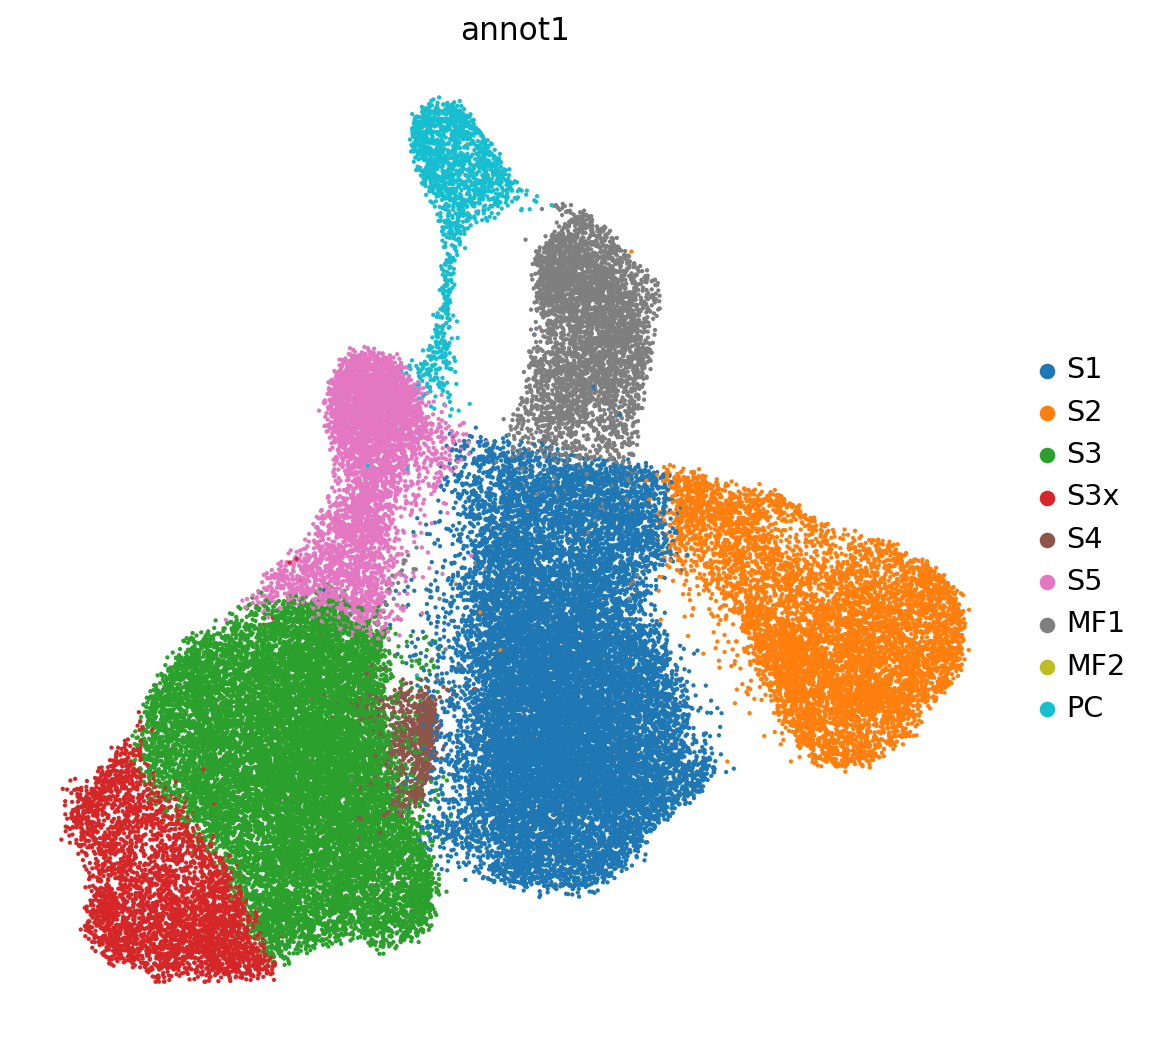

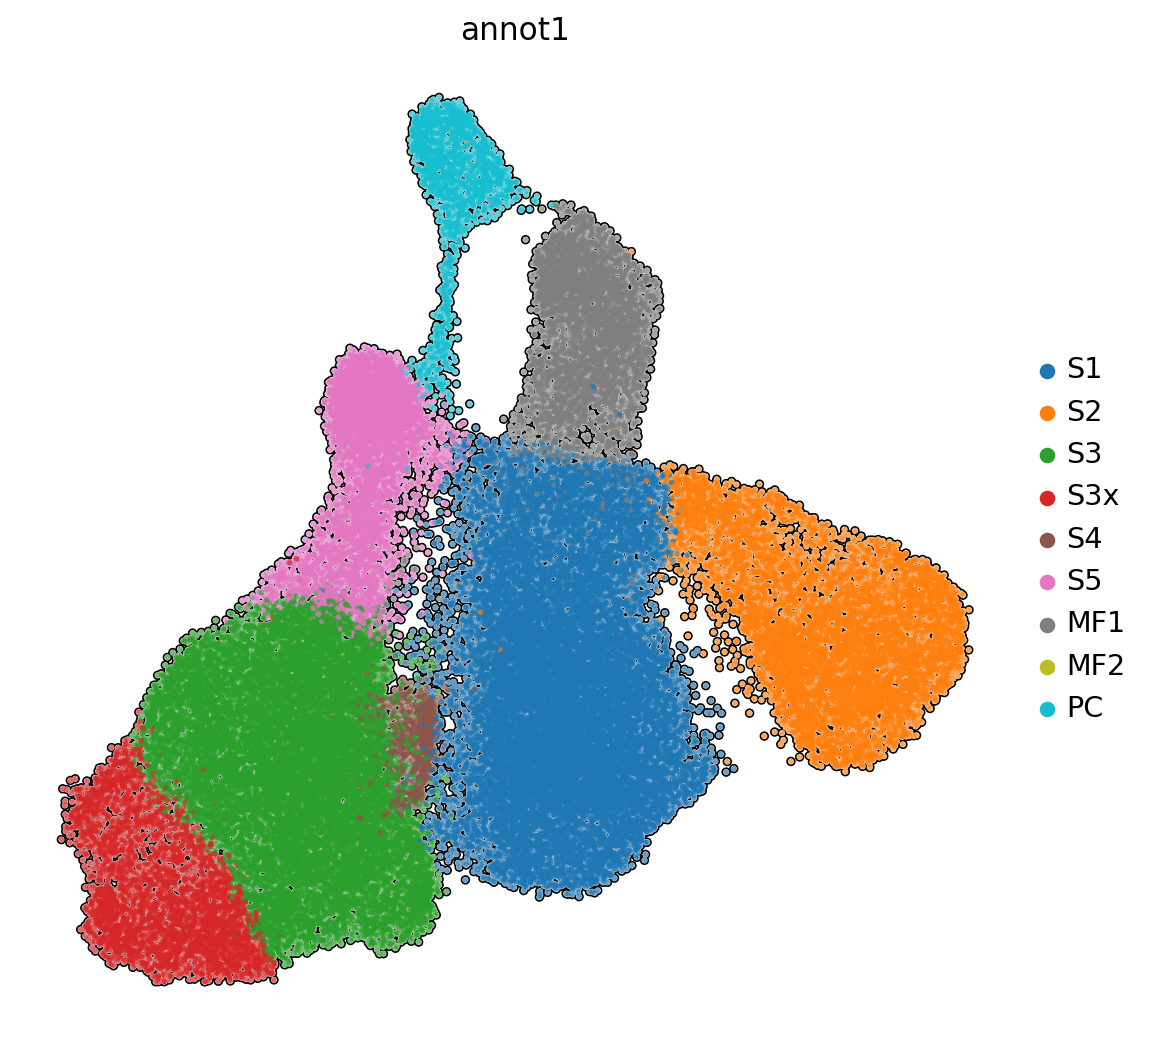

In [17]:
sc.set_figure_params(dpi_save=300, figsize=(8, 8))

# without outline
sc.pl.umap(
    adata,
    color='annot1',
    palette='tab10',
    #palette=sc.plotting.palettes.vega_10_scanpy,  # color blind adjusted, vega10 same as tab10?
    frameon=False,
    size=15,  # point size
    #legend_loc='on data',
    #save='UMAP_ATAC_fibroblast_MF_PC.pdf'  # in ./figures
)

# with outline
sc.pl.umap(
    adata,
    color='annot1',
    palette='tab10',
    frameon=False,
    size=25,  # point size
    add_outline=True,
    #legend_loc='on data',
    #save='UMAP_ATAC_fibroblast_MF_PC_outline.pdf'  # in ./figures
)

In [18]:
# copy plots to local machine:
# scp farm:/lustre/scratch126/cellgen/team205/sk29/matthias_fb/fibroblast_reanalysis/figures/*.pdf fibroblast_reanalysis/

In [19]:
adata.obs.annot1.value_counts()

annot1
S1     18132
S3     15791
S2      7452
S5      4881
MF1     4135
S3x     3819
PC      1678
S4       801
MF2        0
Name: count, dtype: int64

In [20]:
# log transform
#sc.pp.log1p(adata)

In [21]:
sc.tl.rank_genes_groups(adata, groupby='annot1', method='t-test', groups=['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'PC'])

In [22]:
sc.get.rank_genes_groups_df(adata, group=None).to_csv(
    'tables/fibroblast_markers_ttest_ATAC.csv',
    index=False)

In [23]:
tab = sc.get.rank_genes_groups_df(adata, group=None)

In [24]:
tab[tab.group == 'S5'].head(50)

,group,names,scores,logfoldchanges,pvals,pvals_adj
2036915,S5,"chr2:8494554-8495054,LINC01814,Distal",32.213470,4.669691,8.605148e-207,5.972046e-204
2036916,S5,"chr3:52454637-52455137,NISCH,Promoter",30.244780,4.182419,1.505589e-184,7.924438e-182
2036917,S5,"chr6:69827460-69827960,LMBRD1,Distal",30.062281,2.698888,6.680325e-183,3.401814e-180
2036918,S5,"chr20:36847000-36847500,SOGA1,Intronic",29.793787,3.386329,1.007237e-179,4.867510e-177
2036919,S5,"chr7:12490062-12490562,SCIN,Distal",29.740129,3.295226,3.689220e-179,1.768148e-176
2036920,S5,"chr3:142086756-142087256,TFDP2,Intronic",29.548449,4.359698,7.478624e-177,3.466057e-174
2036921,S5,"chr12:121187408-121187908,P2RX4,Exonic",29.151699,4.302233,1.529831e-172,6.665531e-170
2036922,S5,"chr10:70555856-70556356,PRF1,Intronic",29.130968,3.267083,1.703942e-172,7.400396e-170
2036923,S5,"chr14:103715973-103716473,ZFYVE21,Promoter",29.129677,5.413414,3.272803e-172,1.412377e-169
2036924,S5,"chr1:30756652-30757152,LAPTM5,Intronic",28.653395,3.723643,2.996593e-167,1.235588e-164


In [35]:
#print(adata.raw.X[1:10, 1:10])

In [30]:
print(adata.X[1:10, 1:10])

  (1, 3)	6.7662582
  (2, 2)	5.086071
  (3, 2)	2.5430355
  (5, 3)	6.7662582
  (5, 7)	3.181742
  (6, 3)	3.3831291
  (8, 2)	5.086071


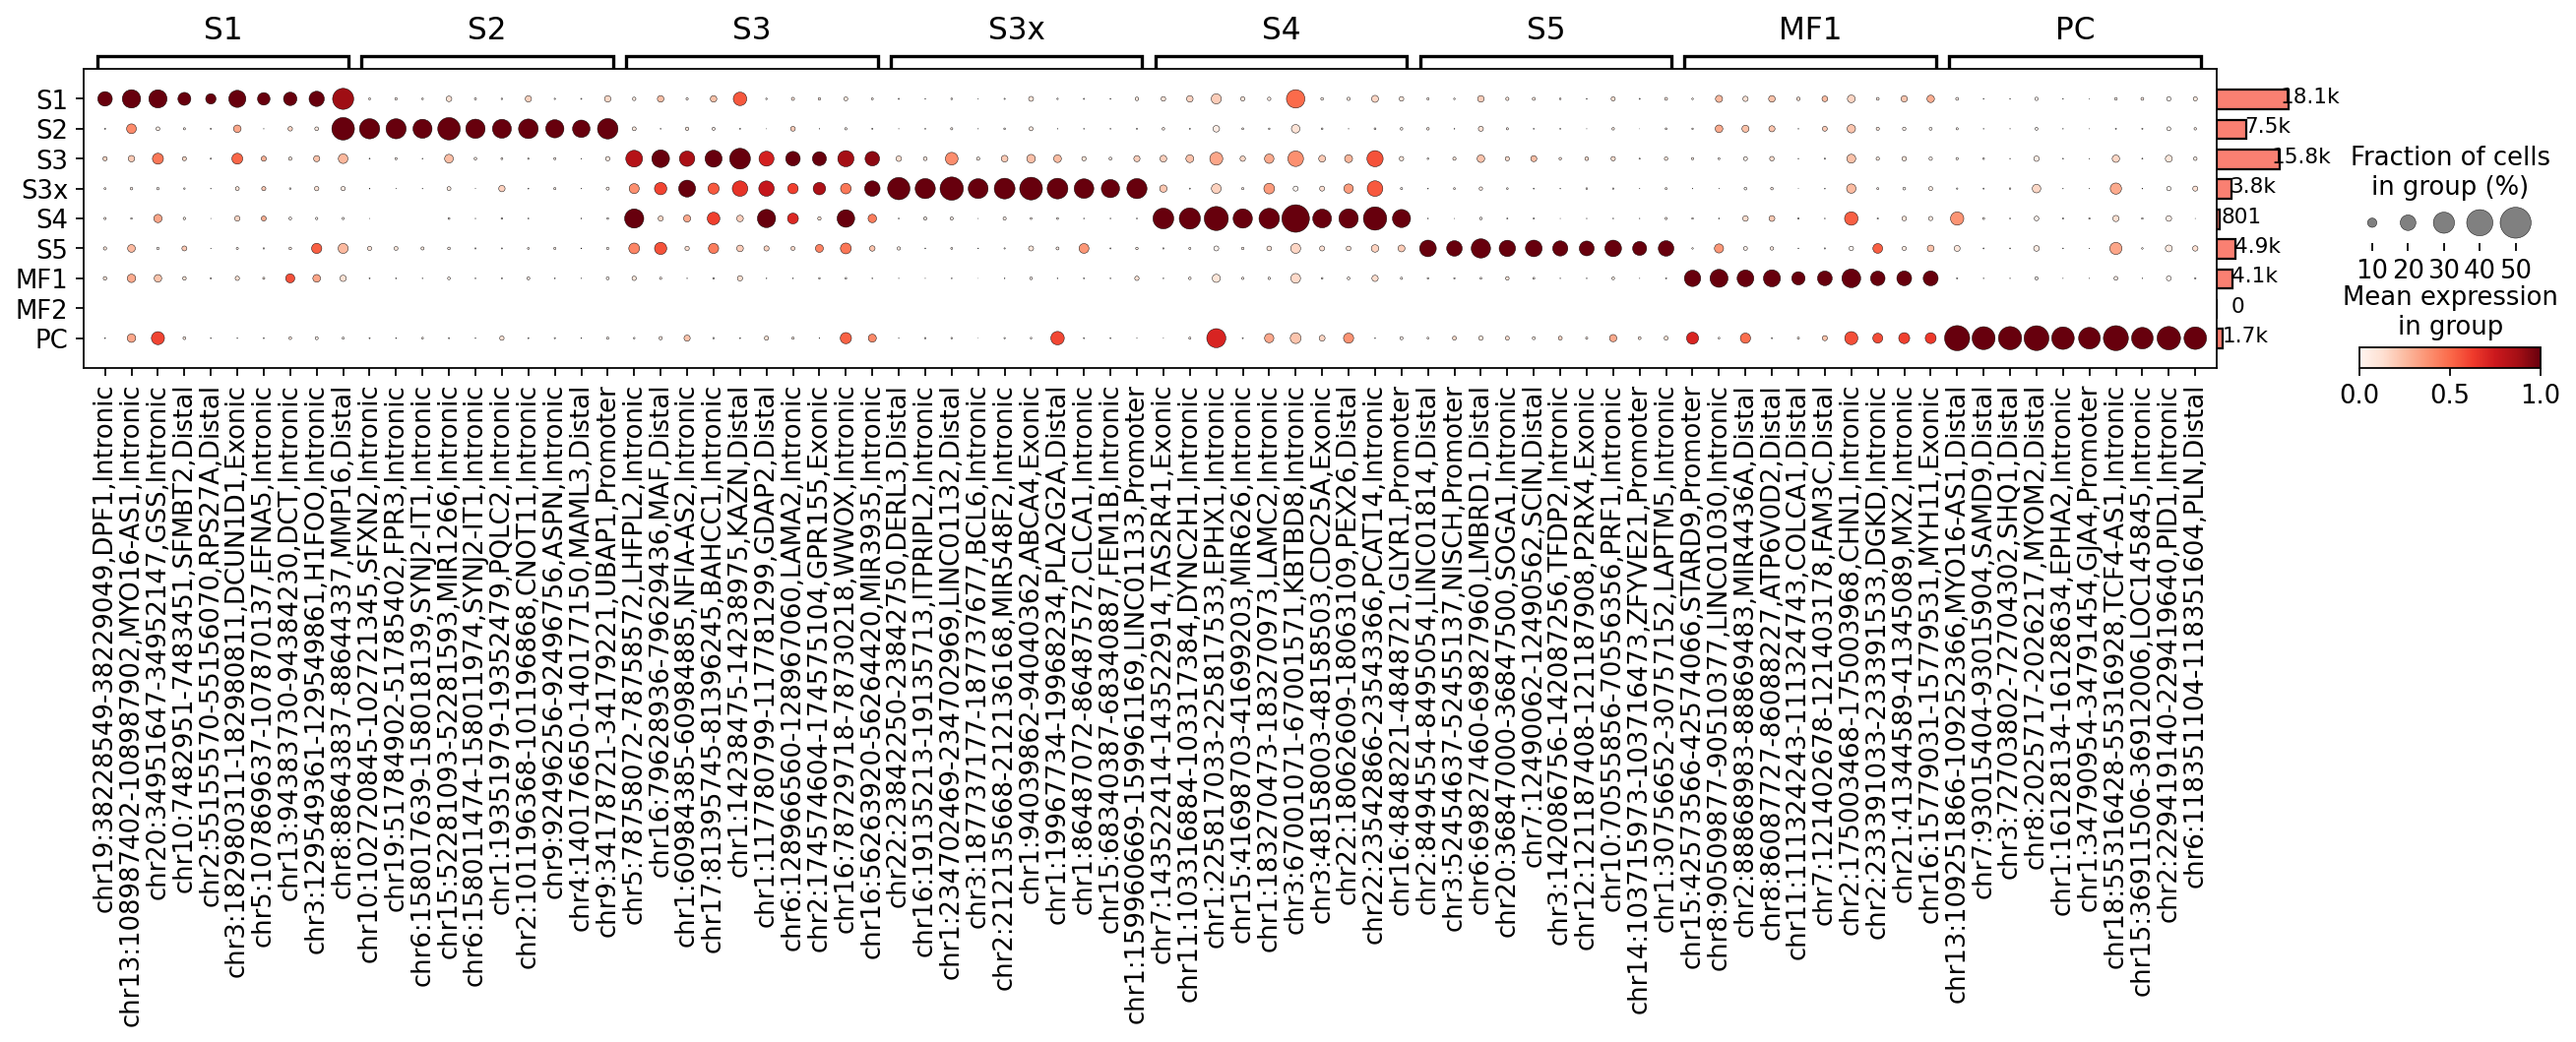

In [42]:
plot = sc.pl.rank_genes_groups_dotplot(
    adata,
    groups=['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'PC'],
    standard_scale='var',
    figsize=(20, 2.5),
    dendrogram=False,
    return_fig=True
#    save="ATACpeaks_top10"
)
plot.add_totals()
plot.savefig("figures/dotplot_ATACpeaks_top10.pdf")

In [31]:
#sc.pl.rank_genes_groups_heatmap(adata, show_gene_labels=True, groups=['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'PC'])

In [ ]:
#adata.X

In [ ]:
#adata

In [ ]:
#sc.pl.rank_genes_groups_dotplot(adata)

In [ ]:
#sc.pl.rank_genes_groups_dotplot(adata, groups=)

In [ ]:
!mkdir -p data

In [ ]:
# # Store file in order to use UMAP layout for visualizing cNMF analysis
# adata.write_h5ad("data/scATAC_PeakMatrix_fibro.processed.h5ad")  # file is ~5GB